In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)
sns.set_style("whitegrid")
plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle')

# Carregue seus dados de séries temporais (substitua 'seus_dados.csv' pelo nome do seu arquivo)
data = pd.read_csv('dataset.csv')
data.drop("estado", axis=1)
data['data_hora'] = pd.to_datetime(data['data_hora'])

data['Francisco Gross'] = data['Francisco Gross'].fillna(data['Francisco Gross'].mean())
data['São João'] = data['São João'].fillna(data['São João'].mean())
data['Pacotuba'] = data['Pacotuba'].fillna(data['Pacotuba'].mean())
data['Soma'] = data['Francisco Gross'] + data['São João'] + data['Pacotuba'] # Certifique-se de que a coluna de data seja do tipo datetime

# Ordene os dados pelo tempo, se ainda não estiverem ordenados
data.sort_values(by='data_hora', inplace=True)

# Divida os dados em treinamento e teste (vamos usar 80% para treinamento e 20% para teste)
train_size = int(0.8 * len(data))
train_data = data[:train_size]
test_data = data[train_size:]

# Crie uma matriz de características X e a variável alvo y
X_train = np.arange(len(train_data)).reshape(-1, 1)  # Usaremos o índice do ponto de dados como feature
y_train = train_data['nível'].values.reshape(-1, 1)

X_test = np.arange(len(train_data), len(train_data) + len(test_data)).reshape(-1, 1)
y_test = test_data['nível'].values.reshape(-1, 1)

In [31]:
# Crie e ajuste o modelo de regressão linear
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [32]:
y_pred = model.predict(X_test)

# Avalie o desempenho do modelo
mse = mean_squared_error(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')

Mean Squared Error (MSE): 0.1428654540444297


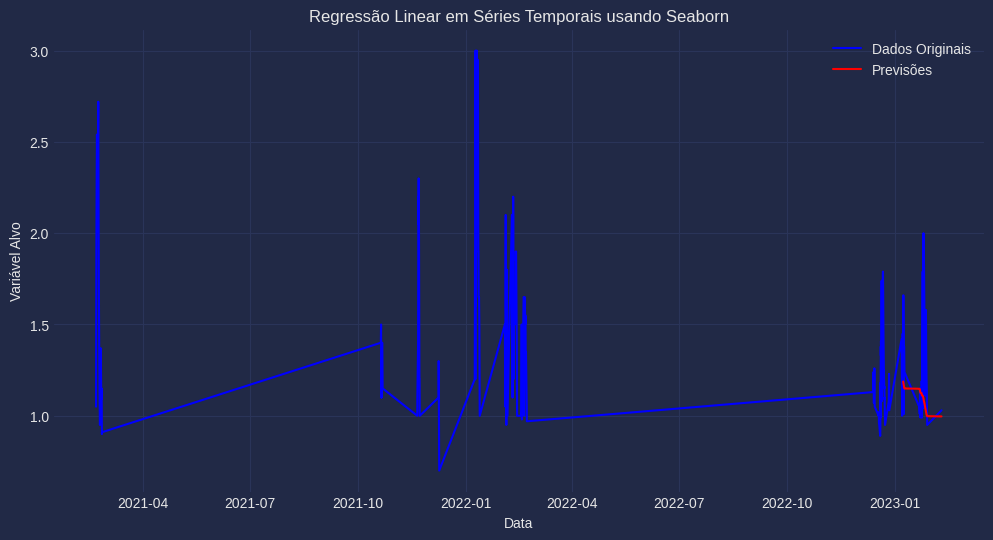

In [33]:
# Plote os resultados
plt.figure(figsize=(12, 6))
sns.lineplot(data=data, x='data_hora', y='nível', label='Dados Originais', color='blue')
sns.lineplot(data=test_data, x='data_hora', y=y_pred.flatten(), label='Previsões', color='red')
plt.xlabel('Data')
plt.ylabel('Variável Alvo')
plt.title('Regressão Linear em Séries Temporais usando Seaborn')
plt.legend()
plt.show()